<a href="https://colab.research.google.com/github/AlejandroHensDelgado/matematicas/blob/main/practicas/practica_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?

 * Decir el camino más corto que se puede tomar usando valores acumulados para saber cual es el camino má corto
3. Explique el algoritmo.

   Consiste en usar los nodos para ver cuáles son las rutas más rápidas. A base del uso de "etiquetas" se dan valores a laS interacciones entre cada nodo y de esa forma se sabrá el camino más corto para llegar de un nodo a otro, ya que a menor valor acumulado más corto es el camino.

4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.

 * Un ejemplo de grafo resuelto con el algoritmo de Dijkstra es el encontrado en esta página web: https://www.ingenieriaindustrialonline.com/investigacion-de-operaciones/algoritmo-de-dijkstra/
* Muestre la imagen del grafo con sus:
<img src="https://www.ingenieriaindustrialonline.com/wp-content/uploads/2019/06/Sin-t%C3%ADtulo-302.png" width="500"/>

  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

<img src="https://www.ingenieriaindustrialonline.com/wp-content/uploads/2019/06/Sin-t%C3%ADtulo-309.png" width="500"/>

   - Si quisiera saber la ruta más corta desde el 1 hasta el 5 simplemente tendría que sumar los valores acumulados, en este caso sería de un valor acumulado total de 90, en caso de ir del 1 al 3 y terminando en el 5. Otras rutas podrían ser del 1 al 4 y de este al 5, para llegar al 4 tendría que pasar por el 3, sumando los valores de cada iteración daría un total de 90.
 
 En cambio, en la ruta del 1 al 4 solo hay una opción que sea la más corta, ya que la otra opción la suma de valores es más alta:
  
    - 1ª opción : pasar por el nodo 1, luego el 2, luego el tres y finalmente en el 4. Esto daría un valor de 130.

    - 2ª opción : pasar por el nodo 1, luego el 3 y finalmente en el 4. Esto daría una valor de 40.

 **En este caso la 2ª opción es mejor ya que tiene un menor valor acumulado.** 

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.

 * El enlace a la página : https://es.stackoverflow.com/questions/316880/una-pregunta-acerca-del-siguiente-c%C3%B3digo-en-python-del-algoritmo-de-dijkstra
 
2. Pruebe su código con algún grafo de ejemplo.

In [1]:
class Graph:

    def minDistance(self, dist, queue):
        minimum = float("Inf")
        min_index = -1

        for i in range(len(dist)):
            if dist[i] < minimum and i in queue:
                minimum = dist[i]
                min_index = i
        return min_index

    def printPath(self, parent, j):

        # Base Case : If j is source
        if parent[j] == -1:
            print (j),
            return
        self.printPath(parent, parent[j])
        print (j),

    def printSolution(self, dist, parent):
        src = 0
        print("Vertex \t\tDistance from Source\tPath")
        for i in range(1, len(dist)):
            print("\n%d --> %d \t\t%d \t\t\t\t\t" % (src, i, dist[i])),
            self.printPath(parent, i)

    def dijkstra(self, graph, src):

        row = len(graph)
        col = len(graph[0])

        dist = [float("Inf")] * row

        parent = [-1] * row

        dist[src] = 0

        queue = []
        for i in range(row):
            queue.append(i)

        while queue:
            u = self.minDistance(dist, queue)
            queue.remove(u)
            for i in range(col):
                if graph[u][i] and i in queue:
                    if dist[u] + graph[u][i] < dist[i]:
                        dist[i] = dist[u] + graph[u][i]
                        parent[i] = u


        self.printSolution(dist, parent)


g = Graph()

graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
         [4, 0, 8, 0, 0, 0, 0, 11, 0],
         [0, 8, 0, 7, 0, 4, 0, 0, 2],
         [0, 0, 7, 0, 9, 14, 0, 0, 0],
         [0, 0, 0, 9, 0, 10, 0, 0, 0],
         [0, 0, 4, 14, 10, 0, 2, 0, 0],
         [0, 0, 0, 0, 0, 2, 0, 1, 6],
         [8, 11, 0, 0, 0, 0, 1, 0, 7],
         [0, 0, 2, 0, 0, 0, 6, 7, 0]]

g.dijkstra(graph, 0)

Vertex 		Distance from Source	Path

0 --> 1 		4 					
0
1

0 --> 2 		12 					
0
1
2

0 --> 3 		19 					
0
1
2
3

0 --> 4 		21 					
0
7
6
5
4

0 --> 5 		11 					
0
7
6
5

0 --> 6 		9 					
0
7
6

0 --> 7 		8 					
0
7

0 --> 8 		14 					
0
1
2
8


## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [11]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

[[1, 2, 3, 5, 6], [0, 3, 6, 7], [0, 3], [0, 1, 2, 4], [3, 5, 8], [0, 4, 8], [0, 1], [1], [4, 5]]


In [1]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

[[0, 1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0]]


## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))

 * Son una estructura de datos con forma de árbol. Está formado por raíces y ramas, estás ramas no pueden tener más de dos hijos, estos hijos son los nodos. Hay diferentes tipos de árboles binarios como el **árbol de búsqueda** o el **árbol de Fibonacci**.
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden: Se buscan las raíces, seguido del primero por la izquierda y seguido por el siguiente de derecha. Es decir dentro del árbol buscas la raíz y luego el primer subárbol de esa raíz por izquierda y después subárbol por la derecha **(R,I,D)**= Raíz, izquierda, derecha.

 - inorden : En este caso, primero va el subárbol por la izquierda seguido de la raíz y después el subárbol derecho. **(I,R,D)**.

 - postorden : En este último caso primero va el subárbol izquierdo seguido del subárbol derecho para finalizar con la raíz. **(I,D,R)**

* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:

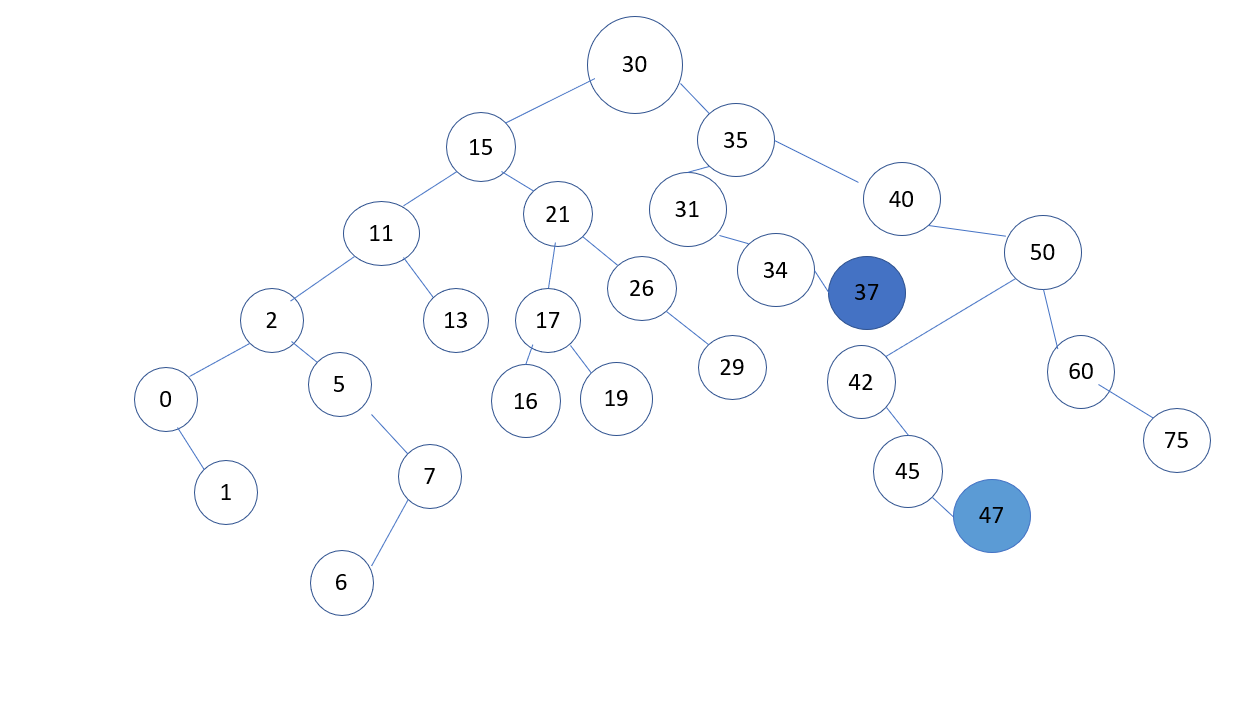


 - preorden: 30,15,11,2,0,1,5,7,6,13,21,17,16,19,26,29,35,31,34,37,40,50,42,45,47,60,75.


 - inorden (observa que en este caso los nodos deben quedar **ordenados** de menor a mayor) : 0,1,2,5,6,7,11,13,15,16,17,19,21,26,29,30,31,34,35,37,42,45,47,50,60,75.


 - postorden : 1,0,6,7,5,2,13,11,16,19,17,29,26,21,15,37,34,31,47,46,42.


* ¿Por qué los BST son importantes en ciencias de la computación?


 Ya que con estos árboles se pueden tomar decisiones y ver de una forma gráfica decisiones complejas que influyen varios factores.

* Pon un link a una página o vídeo que trate este tema en **Python**.
 
  * En este caso consulté varias páginas : https://pythondiario.com/2018/07/arbol-binario-de-busqueda-estructura-de.html

   https://www.delftstack.com/es/howto/python/python-tree/


* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

## Práctica 2.6
* ¿Qué es un **camino hamiltoniano**?

Un camino hamiltoniano es un camino en un grado que pasa por todos los vértices o nodos una única vez sin repetición. En el caso de que el grafo tenga un camino hamiltoniano dentro de este, el grafo se pasa a llamar grafo hamiltoniano.
* Pon un ejemplo

Un ejemplo sería un turista que quiere ver varias ciudades pero quiere pasar por cada una de ellas una sola vez.
* Dibújalo

* Resulevelo
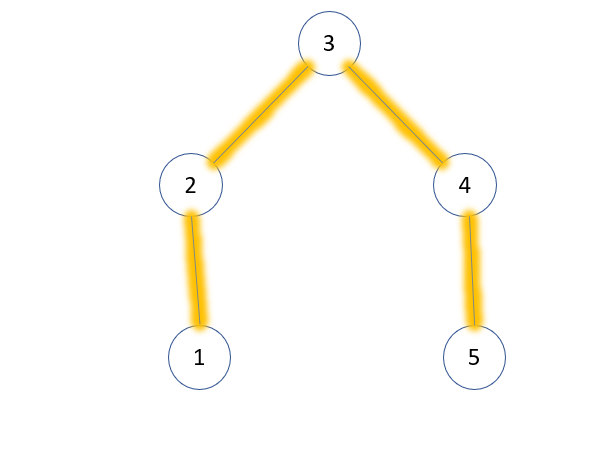
* ¿Qué utilidad tiene?
 * En el caso de nuestro ejemplo nos permitiría saber como realizar el recorrido pasando por cada nodo una única vez.

* Muestra los enlaces a un par de vídeos que hablen de ello

 * https://www.youtube.com/watch?v=ueE7IAfLmqk

 * https://www.youtube.com/watch?v=Eq6OoDzjeOE


## Práctica 2.7
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución
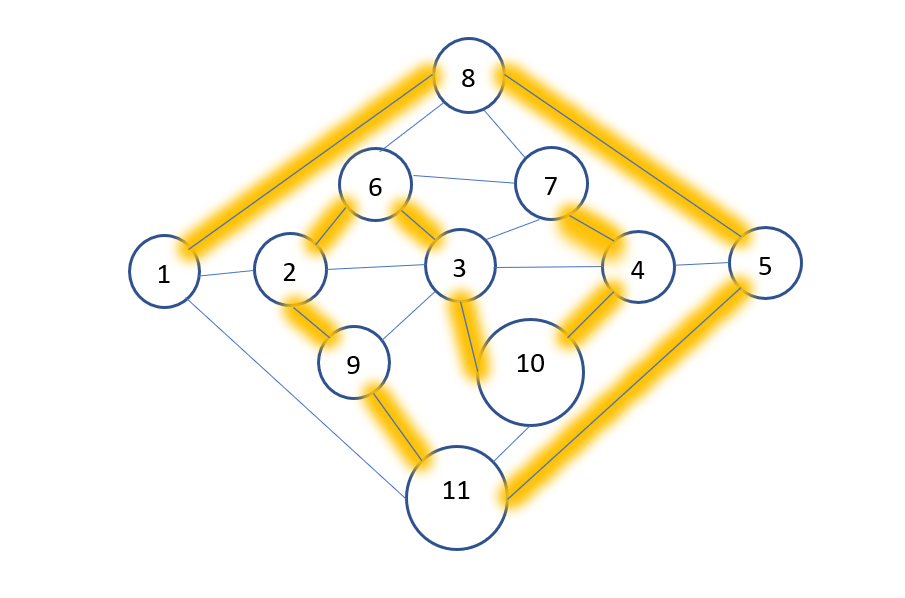

## Práctica 2.8
* El problema de **los puentes de Königsberg**
* Describe el problema

Koningsberg estaba atravesada por un río y el terreno se dividía en cuatro zonas, las zonas tenían una división natural generada por un río, para conectar las zonas se hizo uso de siete puentes. Se quería saber si se podía dar la vuelta a los siete puentes pasando por cada uno una vez y volviendo al mismo punto de inicio.
* Muestra una imagen del grafo resultante


<img src="http://2.bp.blogspot.com/_Sj_ZQzLQVBI/TJeP5hgamjI/AAAAAAAAA98/DcelwRNh0q8/s1600/Konigsburg_graph.jpg" width="200"/>


* Quién fue *Euler* y qué hizo para resolver el problema

Euler fue un matemático que nació en 1707 y murió en 1783, para resolver el problema buscó un método generalizado, consistía en enfocarse en las conexiones entre los puntos y de esta forma llego a la solución.

## Práctica 2.9
* ¿Qué son los **caminos eulerianos**?

Los caminos eulerianos son caminos donde se pasa por todas las aristas sin repetición
* ¿Qué son los **ciclos eulerianos**?

La diferencia con el camino es que el ciclo empieza y acaba en el mismo vértice, al igual que el camino, no se repite.
* Da los enlaces a dos vídeos que hablen de ello
 * https://www.youtube.com/watch?v=w8d-4FyrbYk
 * https://www.youtube.com/watch?v=57yhBHFCb7w

* Dibuja un par de casos

 * El caso del camino euleriano:
 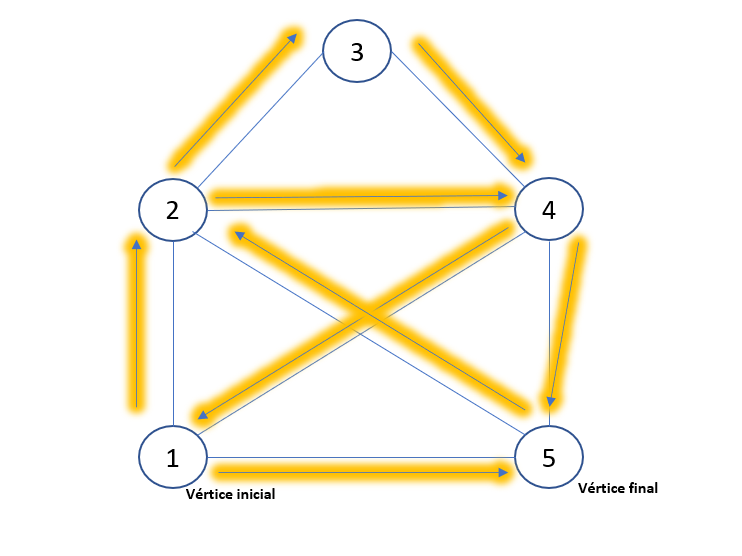
 *  El caso del ciclo euleriano:
 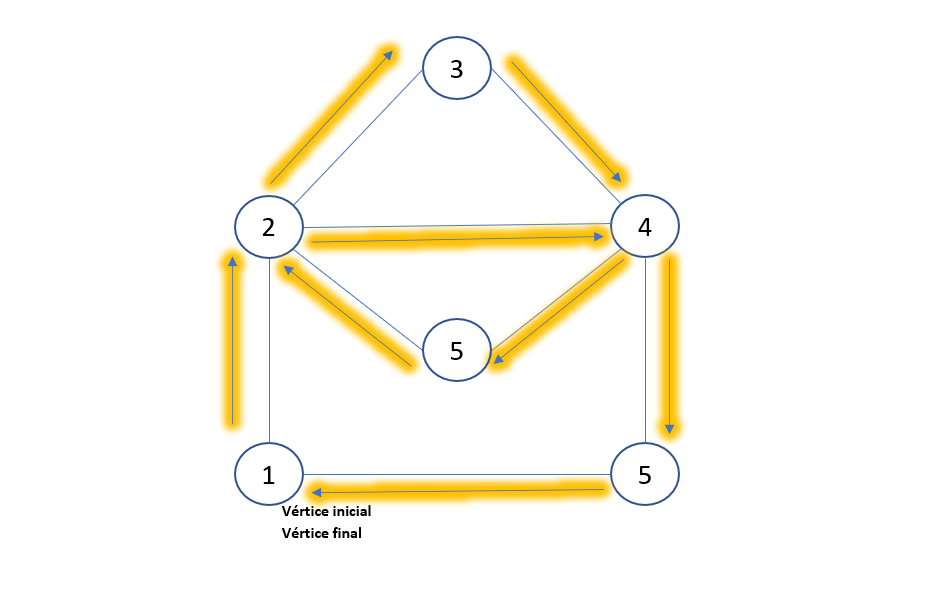

## Práctica 2.10
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo

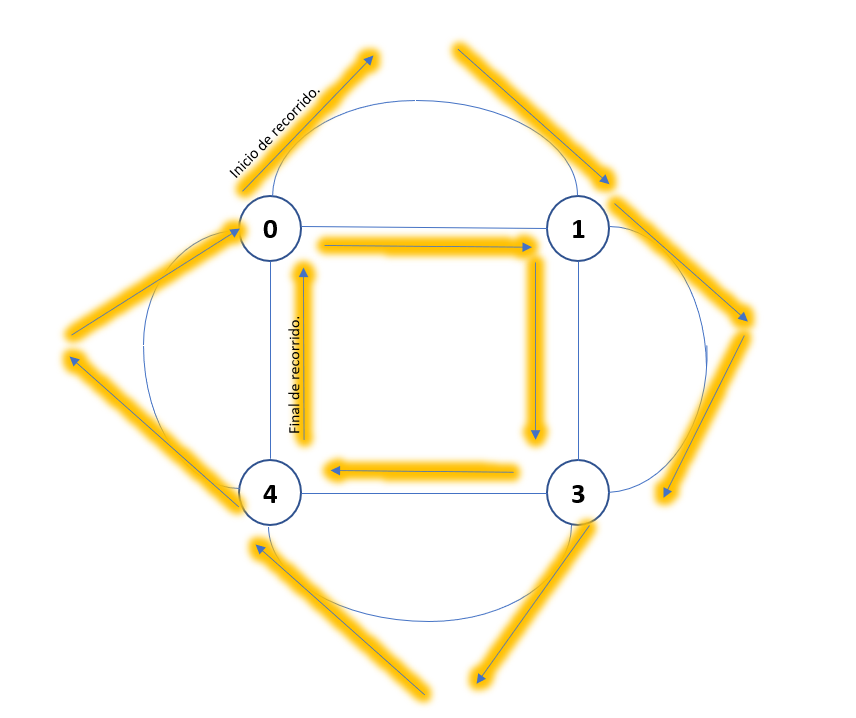
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo
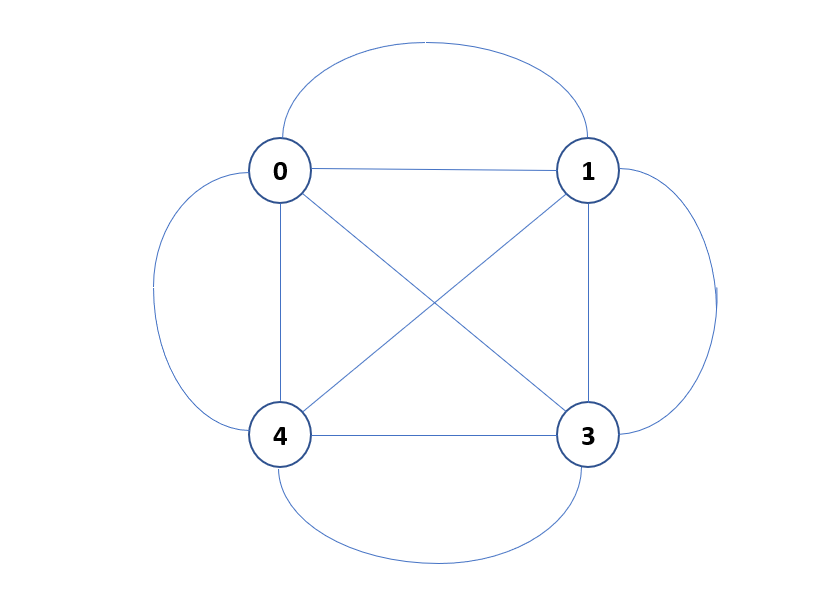
 * Al tener 5 aristas no se puede resolver ya que la condición es que sean 2 impares o todos impares.
